># <center>Hackverse'23 - Team Hogwards

---------------------------
## <center> Visualization File <br>

Name: 
- **KRISH GOYAL** <br>
- **ADITYA PRATAP SINGH**<br>
- **ADITYA PRATAP SINGH**<br>
- **KEDHAR KRISSHAN**<br>

### Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import pandas as pd
from sklearn.preprocessing import LabelEncoder


### Loading the dataset

In [2]:
df=pd.read_csv("Student Info.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,SLA,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,SLA,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,SLA,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,SLA,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
columns_to_check = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                    'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
                    'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

for column in columns_to_check:
    value_counts = df[column].value_counts()
    print(f"\nValue counts for {column}:\n{value_counts}")

In [ ]:
df.describe()

In [ ]:
df.info

C:\Users\goyal\AppData\Local\Temp\ipykernel_20300\2226301619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_mother_education'] = good.Medu
C:\Users\goyal\AppData\Local\Temp\ipykernel_20300\2226301619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_mother_education'] = poor.Medu
C:\Users\goyal\AppData\Local\Temp\ipykernel_20300\2226301619.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabor

Text(0.5, 0, 'Mother Education Level')

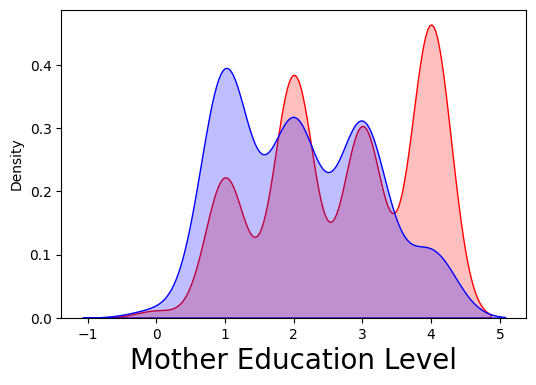

In [3]:
good = df.loc[df.failures==0]
poor=df.loc[df.failures>=1]
good['good_student_mother_education'] = good.Medu
poor['poor_student_mother_education'] = poor.Medu
plt.figure(figsize=(6,4))
p=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")#good_student in red
p=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")#poor_student in blue
plt.xlabel('Mother Education Level', fontsize=20)

In [ ]:
# Creating a frequency plot
fig = px.histogram(df, x='school', color='failures',
                   title='Frequency of Failures for Each School',
                   labels={'school': 'School Code', 'failures': 'Number of Failures'},
                   category_orders={'school': ['LVA', 'GP', 'SLA', 'MS']},
                   color_discrete_sequence=px.colors.sequential.Plasma)

# Showing the plot
fig.show()

In [ ]:
# Grouping by 'school' and calculating the mean for each group
school_means = df.groupby('school')[['G1', 'G2', 'G3']].mean()

# Displaying the mean marks for each school
print("Mean marks for each school:")
print(school_means)

In [ ]:
school_means = df.groupby('school')[['G1', 'G2', 'G3']].mean()

# Plotting the distribution for each school using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=school_means, kde=True, bins=20, palette='viridis', element='step', stat='density')

# Adding labels and title
plt.xlabel('Mean Marks')
plt.ylabel('Density')
plt.title('Distribution of Mean Marks for Each School')

# Showing the plot
plt.show()

**The graph shows the distribution of mean marks for each school**

In [ ]:
df1 = df
df1.drop('school', axis=1, inplace=True)

In [ ]:
corr = df1.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

Correlation of all the features except school.

In [ ]:
df['failed_not_passed'] = df.apply(lambda row: 'Failed' if row['G3'] < 10 else 'Not Passed', axis=1)


def perc(val):
    return val / val.sum() * 100

# Creating a cross-tabulation
failed_not_passed_tab = pd.crosstab(index=df['failed_not_passed'], columns=df['higher'])

# Applying the percentage function and reindex the columns
failed_not_passed_perc = failed_not_passed_tab.apply(perc).reindex(['Failed', 'Not Passed'])

# Plotting the bar chart
failed_not_passed_perc.plot.bar(colormap="Dark2_r", figsize=(14, 6), fontsize=16)
plt.title('Students who  Desire to Receive Higher Education but have failed or not passed in the final grade', fontsize=20)
plt.xlabel('Final Grade Outcome', fontsize=16)
plt.ylabel('Percentage of Students', fontsize=16)
plt.show()

In [ ]:
label_encoder = LabelEncoder()

categorical_columns = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Displaying the updated DataFrame
df

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

In [ ]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['Medu'], df['Fedu'], gridsize=15, cmap='cool', edgecolors='gray', linewidths=0.2)
plt.colorbar(label='Count')
plt.xlabel('Mother Education (Medu)')
plt.ylabel('Father Education (Fedu)')
plt.title('Hexbin Plot of Mother vs Father Education')
plt.show()

- **Hexbin Plot Description:**
  - Represents the relationship between mother and father education using a hexbin plot.

- **Axes Representation:**
  - X-axis represents mother education.
  - Y-axis represents father education.

- **Color Representation:**
  - The color of the hexagons represents the count of data points in that bin.
  - Darker colors indicate a higher count, and lighter colors indicate a lower count.

- **Observations:**
  - The plot effectively illustrates the relationship between mother and father education.
  - Darker colors represent a higher density of data points, while lighter colors represent a lower density.
  - A positive correlation is observed between mother and father education, suggesting that as one parent's education level increases, the other parent's education level tends to increase as well.
  - The highest count is found in the bin where mother education is around 2.5 and father education is around 2.5, indicating that this combination is the most common among the data points.

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='studytime', hue='romantic', data=df, marker='o')

# Setting labels and title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Study Time', fontsize=14)
plt.title('Relationship between Age and Study Time (Grouped by Romantic)', fontsize=16)

# Showing the legend
plt.legend(title='Romantic', loc='upper right')

# Showing the plot
plt.show()

- **Line Graph Description:**
  - Shows the relationship between age and study time.
  - Grouped by romantic status.

- **Axes Representation:**
  - X-axis represents age.
  - Y-axis represents study time in hours.

- **Lines:**
  - Two lines present: one for individuals in a romantic relationship, and one for those who are not.

- **Line Colors:**
  - Line for those in a romantic relationship is orange.
  - Line for those not in a romantic relationship is blue.

- **Data Representation:**
  - Lines are connected by dots representing data points.

- **Shading:**
  - Area between the lines is shaded in light blue.

- **Observations:**
  - Both lines have a positive slope, indicating that as age increases, study time also increases.
  - The line for those in a romantic relationship has a steeper slope, suggesting a stronger relationship between age and study time for this group.

In [ ]:
# Creatin a line plot for 'freetime' and 'goout' grouped by 'romantic'
plt.figure(figsize=(12, 6))
sns.lineplot(x='freetime', y='goout', hue='romantic', data=df, marker='o')

# Setting labels and title
plt.xlabel('Free Time', fontsize=14)
plt.ylabel('Go Out', fontsize=14)
plt.title('Relationship between Free Time and Go Out (Grouped by Romantic)', fontsize=16)

# Showing the legend
plt.legend(title='Romantic', loc='upper right')

# Showing the plot
plt.show()

- **Line Graph Description:**
  - Shows the relationship between free time and going out.
  - Grouped by romantic status.

- **Axes Representation:**
  - X-axis represents free time.
  - Y-axis represents going out.

- **Lines:**
  - Two lines present: one for individuals in a romantic relationship, and one for those who are not.

- **Line Colors:**
  - Line for those in a romantic relationship is red.
  - Line for those not in a romantic relationship is blue.

- **Line Slopes:**
  - Both lines have a positive slope.
  - Indicates that as free time increases, going out also increases.

- **Comparison of Slopes:**
  - The line for those in a romantic relationship has a steeper slope.
  - Suggests a stronger relationship between free time and going out for individuals in a romantic relationship.

In [ ]:
# Creating a histogram for 'absences' grouped by 'Pstatus'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='absences', hue='Pstatus', multiple='stack', kde=True, bins=20)

# Setting labels and title
plt.xlabel('Absences', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Absences (Grouped by Pstatus)', fontsize=16)

# Showing the legend
plt.legend(title='Pstatus')

# Showing the plot
plt.show()

- **Histogram Description:**
  - Shows the distribution of absences grouped by Pstatus.

- **Axes Representation:**
  - X-axis represents the number of absences.
  - Y-axis represents the frequency.

- **Distribution Shape:**
  - The graph is skewed to the right.

- **Skewness Interpretation:**
  - Indicates more students with a lower number of absences than students with a higher number of absences.

- **Frequency Peaks:**
  - The highest frequency of absences is around 0-10 absences.
  - The lowest frequency of absences is around 60-70 absences.

- **Observations:**
  - The graph effectively illustrates the distribution of absences based on Pstatus.

In [ ]:
# Creating a KDE plot for the relationship between 'reason' and 'studytime'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='reason', y='studytime', fill=True, cmap='viridis')

# Setting labels and title
plt.xlabel('Reason', fontsize=14)
plt.ylabel('Study Time', fontsize=14)
plt.title('KDE Plot of Relationship between Reason and Study Time', fontsize=16)

# Showing the plot
plt.show()

- **KDE Plot Description:**
  - Represents the relationship between reason and study time using Kernel Density Estimation (KDE).

- **Axes Representation:**
  - X-axis represents reason.
  - Y-axis represents study time.

- **Plot Type:**
  - Contour plot.

- **Color Representation:**
  - Darker colors represent a higher density of data points.
  - Lighter colors represent a lower density of data points.

- **Observations:**
  - The plot effectively illustrates the relationship between reason and study time.
  - Darker colors indicate a higher concentration of data points.
  - There is a higher density of data points in the lower-left corner and a lower density in the upper-right corner, suggesting a negative relationship.
  - This implies that as the reason for absence increases, the study time decreases.

In [ ]:
# Selecting the relevant columns for visualization
columns_of_interest = ['Fjob', 'Mjob', 'Medu', 'Fedu', 'G1', 'G2', 'G3', 'absences', 'failures']
df_subset = df[columns_of_interest]

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))

# Plotting box plots for each variable
for i, column in enumerate(columns_of_interest):
    sns.boxplot(x='Medu', y=column, data=df_subset, ax=axes[i // 5, i % 5])

# Adjusting layout
plt.tight_layout()
plt.show()


In [ ]:
# Selecting the relevant columns for visualization
columns_of_interest = ['Fjob', 'Mjob', 'Medu', 'Fedu', 'G1', 'G2', 'G3', 'absences', 'failures']
df_subset = df[columns_of_interest]

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))

# Plotting box plots for each variable
for i, column in enumerate(columns_of_interest):
    sns.boxplot(x='Fedu', y=column, data=df_subset, ax=axes[i // 5, i % 5])

# Adjusting layout
plt.tight_layout()
plt.show()